<a href="https://colab.research.google.com/github/ivnlee/tec-mna-nlp/blob/main/semana-10/Equipo13_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformer GPT y Web-Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

De la siguiente liga de Tripadvisor selecciona un hotel en la zona de la ciudad de Monterrey, México, que consideres adecuado para extraer los comentarios de español y evaluaciones de usuarios:

https://www.tripadvisor.es/Hotels-g150782-Monterrey_Northern_Mexico-Hotels.html

### 1. Mediante web scraping realiza una extracción de los comentarios y calificaciones a dicho hotel. Recuerda que Tripadvisor representa las calificaciones mediante círculos verdes. Los comentarios deben ser de usuarios que los redactaron en idioma en español. Indica la cantidad de comentarios y sus calificaciones que extrajiste.

In [ ]:
url = "https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html"

html = requests.get(url,
                    headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
                    )

print(html.status_code)

200


In [ ]:
links = []

max_or_num = 1960  # 1964 reseñas en español.

reviews_x_pages = 5    # 5 reseñas por pagina

for k in range(0, max_or_num, reviews_x_pages):
  a = url
  if k == 0:
    ss = '{}'     # Para la primera página es el -or con valor vacío.
  else:
    ss = str(k)  # convertimos a string el valor numérico.
  a = a[:(a.find('Reviews')+7)] + '-or' + ss + a[(a.find('Reviews')+7):]  # Los índices de "Reviews" van de 0 a 6, ya que tiene 7 letras.
  links.append(a)

# Imprimimos los primeros 10
links[0:10]

['https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or{}-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or5-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or10-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or15-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or20-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or25-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or30-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-

In [ ]:
from random import randint
from time import sleep
import re

In [ ]:
reviews = []
stars = []

numpages = int( max_or_num / reviews_x_pages )

for link in links[0:numpages]:

  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)

  sleep(randint(1,5))

  # objeto de la librería BeautifulSoup para llevar a cabo nuestra tarea
  bsobj2 = soup(html2.content,'lxml')

  for review in bsobj2.findAll('span', {'class' : 'QewHA'}):
      reviews.append(review.text.strip())

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

  # Extraigamos también las calificaciones (estrellas):
  for cal in bsobj3.findAll('div', {'class' : 'Hlmiy'}):
    # Extraemos solo la calificacion (en este caso: 10, 20, 30, 40 o 50)
    cal = re.findall(r'\d{2}', ' '.join(str(x) for x in cal))

    stars.append(cal)

In [ ]:
# Imprimimos los primeros 3 comentrios y su calificación
for i in range(3):
   print(reviews[i])
   print(stars[i])

**Cantidad de comentarios y calificaciones extraídas:**

In [ ]:
print('Cantidad de comentarios:', len(reviews), '\nCantidad de calificaciones:', len(stars))

Cantidad de comentarios: 1960 
Cantidad de calificaciones: 1960


### 2. Para considerarlo como un problema binario, convierte las calificaciones a valores de 0 (comentario negativo) y 1 (comentario positivo).

###**a.** En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por ejemplo. Justifica la decisión tomada.

In [ ]:
df_review = pd.DataFrame(reviews, columns=['review'])
df_stars = pd.DataFrame(stars, columns=['stars'])

df = pd.concat([df_review, df_stars], axis=1)
df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,20
1,"Las habitaciones están algo descuidadas, no co...",30
2,le falta mucho mantenimiento ya es un hotel vi...,20
3,Hice la reservación pero no me quedé ya que en...,30
4,"Un hotel muy limpio, seguro y tranquilo además...",50


In [ ]:
for i in range(len(df['stars'])):
  if int(df['stars'][i]) >= 40:
    df['stars'][i] = 1
  else:
    df['stars'][i] = 0

df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,0
1,"Las habitaciones están algo descuidadas, no co...",0
2,le falta mucho mantenimiento ya es un hotel vi...,0
3,Hice la reservación pero no me quedé ya que en...,0
4,"Un hotel muy limpio, seguro y tranquilo además...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1960 non-null   object
 1   stars   1960 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [ ]:
# Guardamos dtaframe como CSV para utilizarlo posteriormente
##
#df.to_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv')

###**b.** Indica la proporción de comentarios positivos y negativos que tienes ahora.

Mounted at /content/drive


<Axes: title={'center': 'Distribución de Clases'}, ylabel='Frequency'>

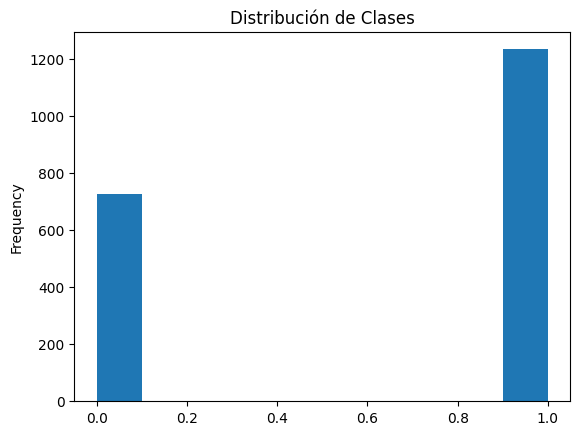

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv', index_col=0)

df['stars'].plot(kind='hist', title='Distribución de Clases')

In [ ]:
df['stars'].value_counts()

1    1233
0     727
Name: stars, dtype: int64

### 3. Selecciona y aplica un modelo Transformer generador de texto en español de la plataforma de HuggingFace para “balancear” los porcentajes de comentarios positivos y negativos.

### Indica la cantidad de datos sintéticos que vas a generar, en particular contesta las siguientes preguntas:
* **a. ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por qué?**

Sol vamos a generar datos sintéticos de la clase minoritaria. Como el objetivo es balancear las clases eso significa que si generáramos datos de la clase mayoritaria, entonces tendríamos que generar aún más datos de la clase minoritaria y como las clases no están tan desbalanceadas creemos que es mejor trabajar con la mayor cantidad de datos duros posibles.

* **b. ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?**

Como es de esperarse, en el mundo real es difícil encontrar datos completamente balanceados por lo que intentaremos solamente generar un menor desbalanceo con la finalidad de que el modelo pueda mejorar su aprendizaje. Por lo anterior, y dado que el desbalanceo actual es del 37-63, decidimos que los datos sintéticos fueran como máximo el 20% de los datos de la clase minoritaría. Así, generaremos 173 comentarios negativos con lo que el rebalanceo es del 42-58 y estos datos representan alrededor del 19% del total de comentarios negativos en el conjunto de datos.  

*NOTA: Recuerda que no siempre es lo mejor balancearlos al 50% cada clase, porque si el conjunto original está demasiado desbalanceado y los datos sintéticos generados son de muy buena calidad, los resultados obtenidos al final podrían ser bastante desastrosos.*

In [ ]:
!pip install transformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM

In [ ]:
model = 'jalbarracin/spanish-alpaca-mT5'
model_tokenizer = 'jalbarracin/spanish-alpaca-mT5'
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)
model = AutoModelForSeq2SeqLM.from_pretrained(model).to('cpu') #cambiar a 'cuda' para usar GPU

Some weights of MT5ForConditionalGeneration were not initialized from the model checkpoint at jalbarracin/spanish-alpaca-mT5 and are newly initialized: ['decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Aqui siempre debes comenzar el prompt con "instrut5:"
prompt ="""instrut5: Escribe comentario negativo sobre el mal servicio de un Hotel<in></in>"""
inputs = tokenizer(prompt, return_tensors="pt").to('cpu') #cambiar a 'cuda' para usar GPU

In [ ]:
#SI TIENEN GPU CON ESTE Y SI NO LOS OTROS BLOQUES DE ABAJO
outputs = model.generate(inputs["input_ids"],
                         do_sample = True,
                         max_length = 120,
                         num_return_sequences=173,
                         top_k=50,
                         top_p=0.90,
                        )
detok_outputs = [tokenizer.decode(x, skip_special_tokens=True) for x in outputs]

### 4. Realiza una partición de los datos en entrenamiento, validación y prueba con los porcentajes que consideres adecuados.


In [ ]:
#Primero generamos los conjuntos X y Y ya con los comentarios sintéticos
X1 = df["review"]
#X = X1.tolist() + detok_outputs_1 + detok_outputs_2 + detok_outputs_3 + detok_outputs_4 + detok_outputs_5
X = X1.tolist() + detok_outputs

Y1 = df["stars"]
zeros = [0] * 173
Y = Y1.tolist() + zeros

print(len(X))
print(len(Y))

2133
2133


In [ ]:
#Particion de conjunto con datos sinteticos
from sklearn.model_selection import train_test_split

#Generamos los conjuntos de entrenamiento, validación y pruebas
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, random_state=42)
Xt, Xv, yt, yv = train_test_split(Xtv, ytv, test_size=0.2, random_state=42)

#Validamos los tamaños de los conjuntos
print("Conjunto de entrenamiento:", len(Xt))
print("Conjunto de validacion:", len(Xv))
print("Conjunto de prueba:", len(Xtest))

Conjunto de entrenamiento: 1450
Conjunto de validacion: 363
Conjunto de prueba: 320


In [ ]:
from sklearn.model_selection import train_test_split

# Partición de conjunto sin datos sintéticos
X_train_val, X_test, y_train_val, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Nueva partición para obtener el conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Imprimir los tamaños de los conjuntos
print("Conjunto de entrenamiento:", len(X_train))
print("Conjunto de validación:", len(X_val))
print("Conjunto de prueba:", len(X_test))

Conjunto de entrenamiento: 1176
Conjunto de validación: 392
Conjunto de prueba: 392


 ### 5. Mediante un Transformer que consideres adecuado para idioma español de la plataforma HuggingFace, aplica un modelo de clasificación binaria (análisis de sentimiento) para los datos originales, es decir, sin incluir los comentarios sintéticos. ¿Qué desempeño obtienes?

In [ ]:
#!pip install pysentimiento

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Descargamos el tokenizador y modelo pre-entrenado
tokenizer = AutoTokenizer.from_pretrained("edumunozsala/beto_sentiment_analysis_es")
model = AutoModelForSequenceClassification.from_pretrained("edumunozsala/beto_sentiment_analysis_es")

# Comentarios en español
text_list = df["review"].tolist() # Lista de comentarios en español
label_list = df["stars"].tolist() # Lista de etiquetas de sentimiento reales (0 para negativo, 1 para positivo)
predicted_labels = []

# Usar el modelo y tokenizer para hacer el análisis de sentimientos para cada comentario
for i in range(len(df['review'])):
  input_ids = torch.tensor(tokenizer.encode(text_list[i])).unsqueeze(0) # tokeniza el texto
  outputs = model(input_ids)                                            # genera preddiccion del modelo
  output = outputs.logits.argmax(1).item()                              # extraemos la prediccion (label) 0 o 1
  predicted_labels.append(output)

In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(label_list, predicted_labels)

# Imprimir los resultados
print(f"Accuracy: {accuracy}")

Accuracy: 0.8341836734693877


####**6. Ahora realiza el entrenamiento y evaluación de los conjuntos aumentados (reales más sintéticos). En este caso sí aplica un modelo con fine-tuning. ¿Por qué en este caso no se justificaría utilizar la técnica out-of-box para entrenar y evaluar directamente los datos con los comentarios sintéticos?**


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
import torch

# Cargar el modelo y el tokenizador
model_name = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenizar los datos de entrenamiento+validación y prueba
X_trainval_tokenized = tokenizer(Xtv, truncation=True, padding=True)
X_test_tokenized = tokenizer(Xtest, truncation=True, padding=True)

# Convertir los datos a tensores
X_trainval_tensor = torch.tensor(X_trainval_tokenized.input_ids)
y_trainval_tensor = torch.tensor(ytv)
X_test_tensor = torch.tensor(X_test_tokenized.input_ids)
y_test_tensor = torch.tensor(ytest)

# Crear el dataset y el dataloader
trainval_dataset = torch.utils.data.TensorDataset(X_trainval_tensor, y_trainval_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 8
trainval_dataloader = torch.utils.data.DataLoader(trainval_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Entrenar el modelo
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
epochs = 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in trainval_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")


Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuc

Epoch 1: Loss = 104.4296
Epoch 2: Loss = 65.3281
Epoch 3: Loss = 45.5828


In [ ]:
# Evaluar el modelo en el conjunto de prueba
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.88125
